## **i. Mount google drive**
---

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **ii. Import the libraries**
---

In [ ]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Versions of key libraries")
print("---")
print("cv2:       ", cv2.__version__)
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)


Versions of key libraries
---
cv2:        4.1.2
numpy:      1.19.5
matplotlib: 3.2.2


## **iii. Append /iss/vse/data/ in your python path**
---

In [ ]:
sys.path.append('/content/gdrive/My Drive/iss/vse/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/']

## **iv. Change working directory to /iss/vse/data/**
---

In [ ]:
os.chdir('/content/gdrive/My Drive/iss/vse/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/vse/data'

## **v. Define `cv2plt` for image display**
---

In [ ]:
def cv2plt(img):
    plt.figure(figsize=(7,7))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x7fb4c8619950>


## **Question a**
---
Read in the image 'ajbp.jpg' and display the image. Name the array as `ajbp`.

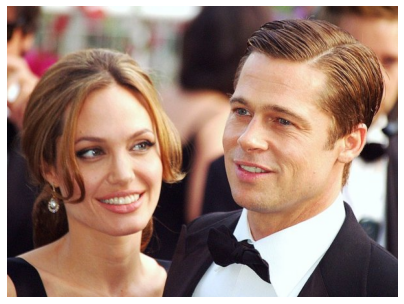

In [ ]:
# Type your code below

ajbp = cv2.imread('ajbp.jpg')
cv2plt(ajbp)

## **Question b**
---
Write a function that can detect faces, eyes and smiles with the below signature: <br><br>

&nbsp;&nbsp;&nbsp;&nbsp;`def faceDetection(img,scaleFct=1.3,faceNbr=5,eyeNbr=None,smileNbr=None):`
        
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; .....
        
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return [img,faces,eyes,smiles]` <br><br>

   
The above function by default detect faces in an image. `faceNbr`, `eyeNbr`, `smileNbr` denote the `minNeighbors` for face, eye, and smile respectively. When no value is specified for `eyeNbr` or `smileNbr`, no detection will be done for eye or smile.<br><br>

The returned `img` shows the detected faces, eyes or smiles.
See the below output for example. Run the code below to see the required output.<br><br>

The returned `faces`, `eyes`, `smiles` contain the `x, y, w, h`
of each identified boxes.<br><br>

The colour of the box for faces: `(255,255,255)`<br>
The colour of the box for eyes: `(191,191,191)`<br>
The colour of the box for smiles: `(127,127,127)`<br>
The line thickness is `2` for all types of boxes.<br>

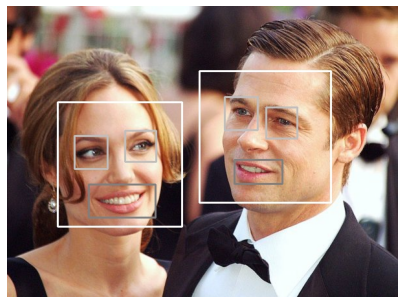

In [ ]:
# Run the code below to see the required output.

cv2plt(cv2.imread('wks2_4_c.jpg'))

In [ ]:
# Type your code below
def faceDetection(img,scaleFct=1.3,faceNbr=5,eyeNbr=None,smileNbr=None):
  imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  fce = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  sml = cv2.CascadeClassifier('haarcascade_smile.xml')
  eye = cv2.CascadeClassifier('haarcascade_eye.xml') 
  face= fce.detectMultiScale(imggray, scaleFactor=1.3, minNeighbors=5)
  for (x,y,w,h) in face:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
    fcolor = img[y:y+h,x:x+w]
    fgray = imggray[y:y+h,x:x+w]
    smle= sml.detectMultiScale(fgray, scaleFactor=1.3, minNeighbors=30)
    eyes = eye.detectMultiScale(fgray, scaleFactor=1.3, minNeighbors=20)
    for (px,py,pw,ph) in smle:
      cv2.rectangle(fcolor,(px,py),(px+pw,py+ph),(127,127,127),2)
    for (ex,ey,ew,eh) in eyes: 
      cv2.rectangle(fcolor,(ex,ey),(ex+ew,ey+eh),(191,191,191),2)
  return [img,face,eyes,smle]


## **Question c**
---
Perform the detection of faces, eyes and faces on 'ajbp.jpg' and display the output

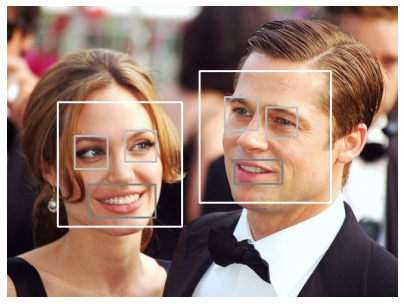

In [ ]:
# Type your code below

detect, face, eye, smile = faceDetection(ajbp)
cv2plt(detect)